In [1]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1


In [2]:
# import pandas as pd
# from src.model import arx_model
# import numpy as np
# import scipy.signal as sp

# def test_arx_model(B=np.array([0.5, 0.25]), A =np.array([1, 1.6, 0.95]), N=1000):
    
#     u = np.random.rand(N)
#     y = sp.lfilter(B,A,u)
#     output_y = print(y.shape)
#     theta, Phi, Y = arx_model(u, y, 2)
#     # assert Y = 
#     # assert theta = []
#     # assert Phi =
    
#     c = print(theta) 
#     return c, output_y

# call = test_arx_model()

# print(call)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import re
from src.model_fitting import fit_and_plot_cycle
import src.plotting as ptt
from src.file_loader import load_csv_files
from src.model_fitting import fit_and_plot_cycle
from src.model import arx_model
import src.sysid_util as sid
import scipy as sp
import control as ct


In [25]:
# import importlib
# import src.data_processing
# import src.model_fitting
# import src.plotting
# import src.model
# import src.file_loader
# import src.cost_function

# # After modifying the modules, reload them
# importlib.reload(src.data_processing)
# importlib.reload(src.model_fitting)
# importlib.reload(src.plotting)
# importlib.reload(src.model)
# importlib.reload(src.file_loader)
# importlib.reload(src.cost_function)


In [4]:
# List of file names
file_names = [
    '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (1).csv',
    '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (2).csv',
    '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (1).csv',
    '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (2).csv',
    '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (1).csv',
    '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (2).csv',
    '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (1).csv',
    '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (2).csv'
]

dataframes = load_csv_files(file_names, '','Hydrogen Project')

# # Display the first 5 rows of each DataFrame
# for key, df in dataframes.items():
#     print(f"Head of DataFrame {key}:")
#     print(df.head(5))
#     print("\n")

In [6]:
# Assuming `load_csv_files` returns a dictionary of DataFrames keyed by file names
for file_name, df in dataframes.items():
    print(f"File: {file_name}")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("-" * 40)


File: 9171_20240626_120_s_N11503200095_Polarization_High_to_low_80_deg_C_4_mpm_corr_1_csv
Rows: 11392, Columns: 5
----------------------------------------
File: 9171_20240626_120_s_N11503200095_Polarization_High_to_low_80_deg_C_4_mpm_corr_2_csv
Rows: 11394, Columns: 5
----------------------------------------
File: 9171_20240626_120_s_N11503200095_Polarization_Low_to_high_80_deg_C_4_mpm_corr_1_csv
Rows: 11394, Columns: 5
----------------------------------------
File: 9171_20240626_120_s_N11503200095_Polarization_Low_to_high_80_deg_C_4_mpm_corr_2_csv
Rows: 11386, Columns: 5
----------------------------------------
File: 9171_20240627_120_s_N11503200095_Polarization_High_to_low_80_deg_C_6_mpm_corr_1_csv
Rows: 11294, Columns: 5
----------------------------------------
File: 9171_20240627_120_s_N11503200095_Polarization_High_to_low_80_deg_C_6_mpm_corr_2_csv
Rows: 11323, Columns: 5
----------------------------------------
File: 9171_20240627_120_s_N11503200095_Polarization_Low_to_high_80_deg

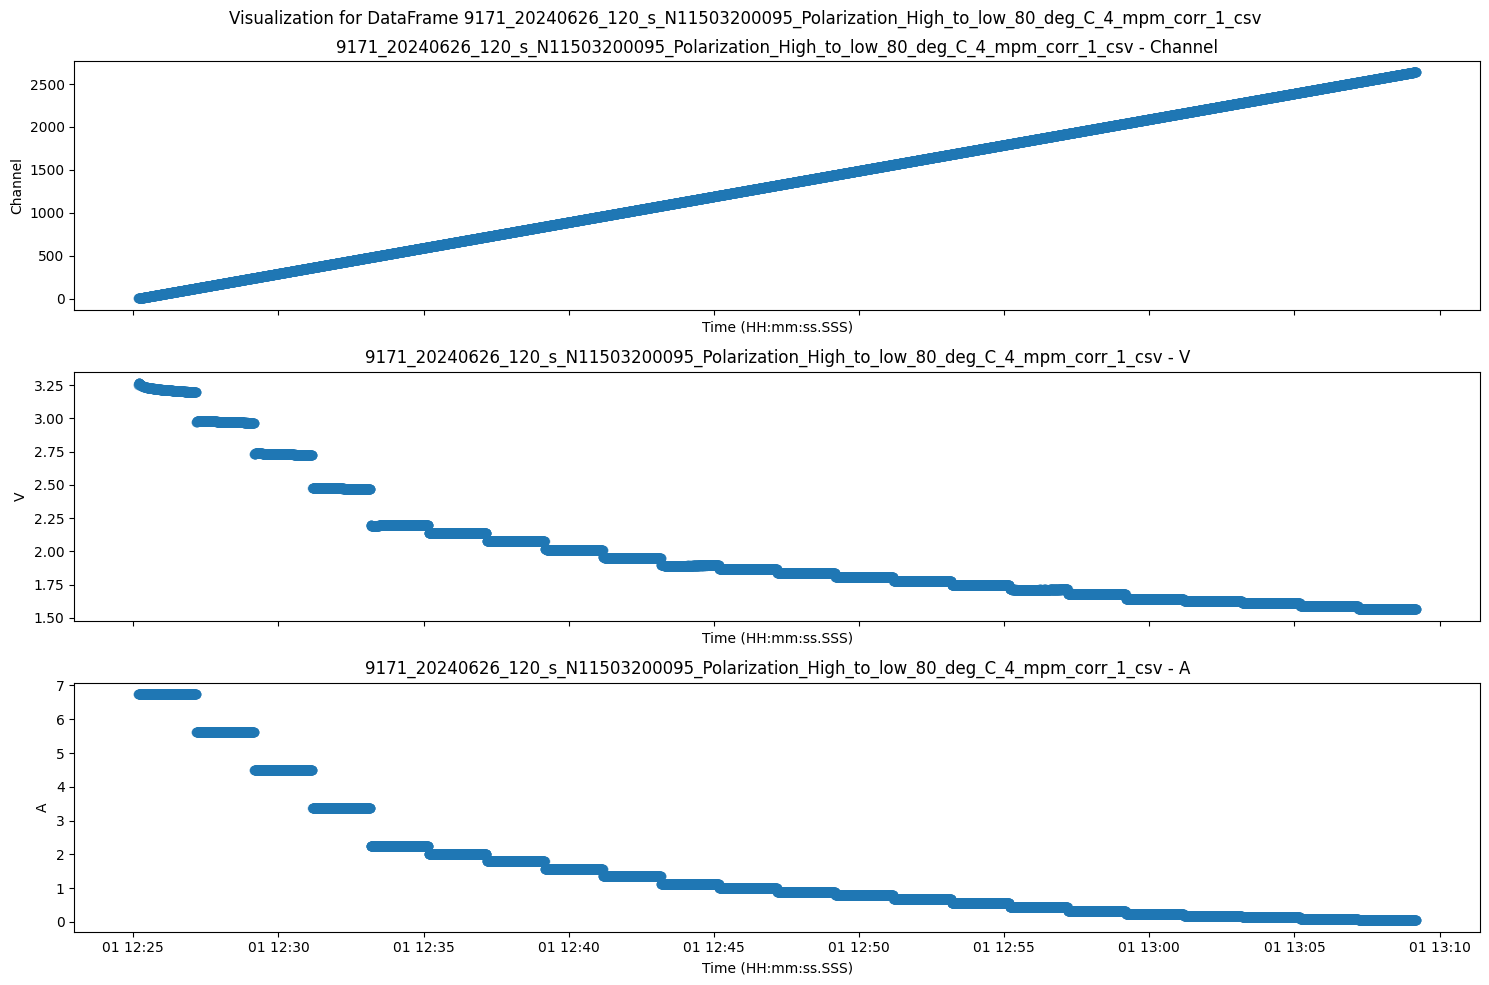

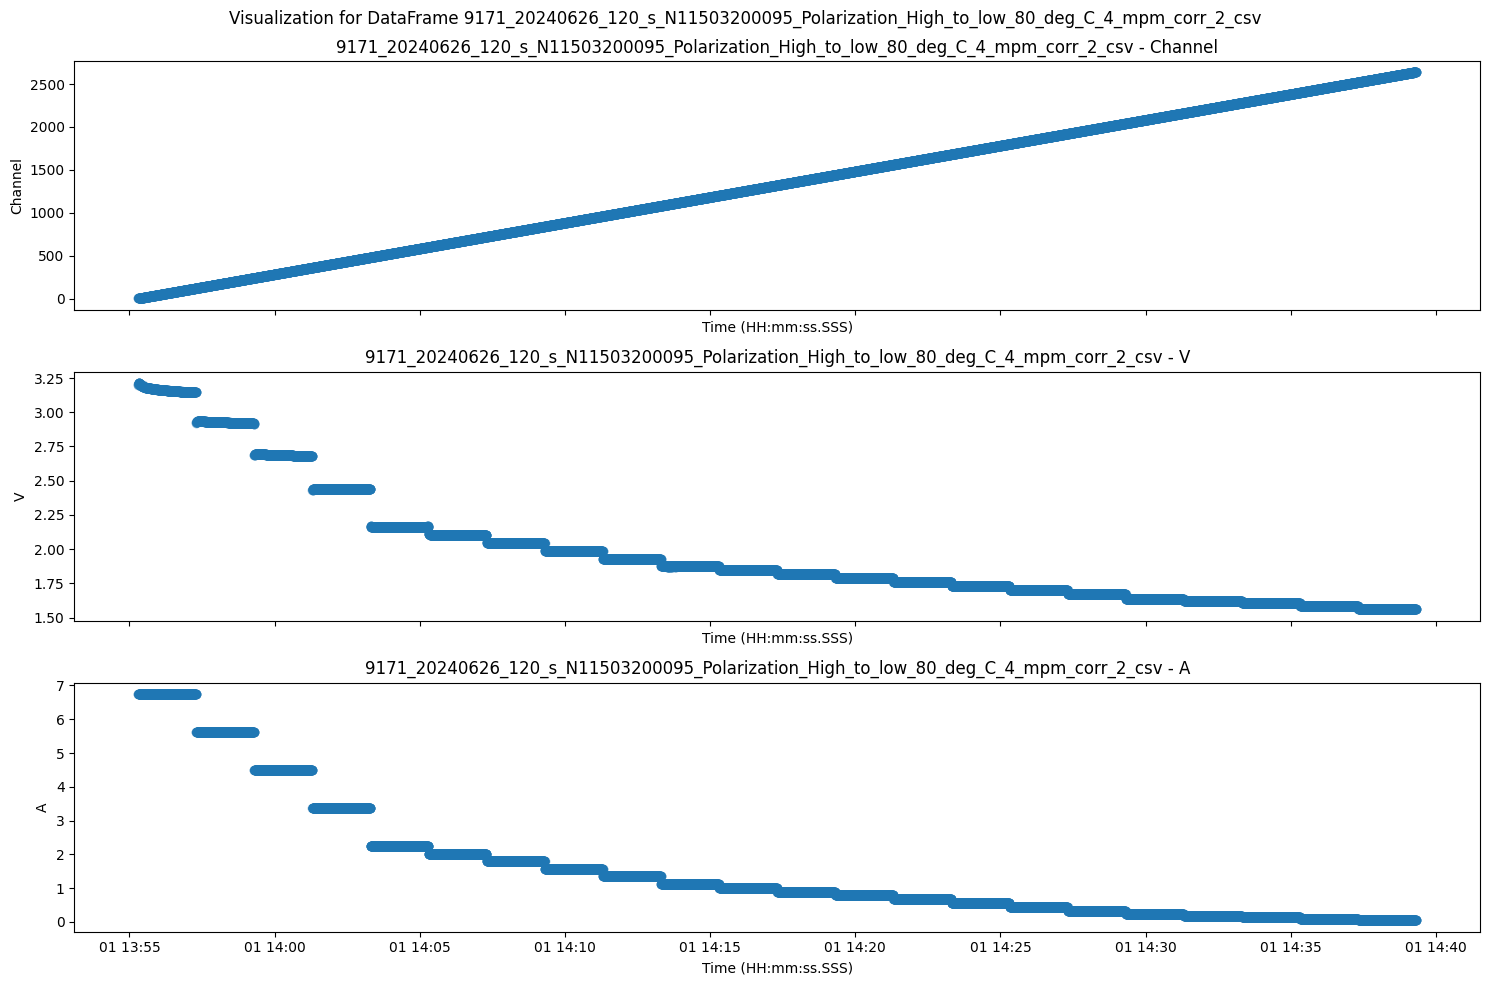

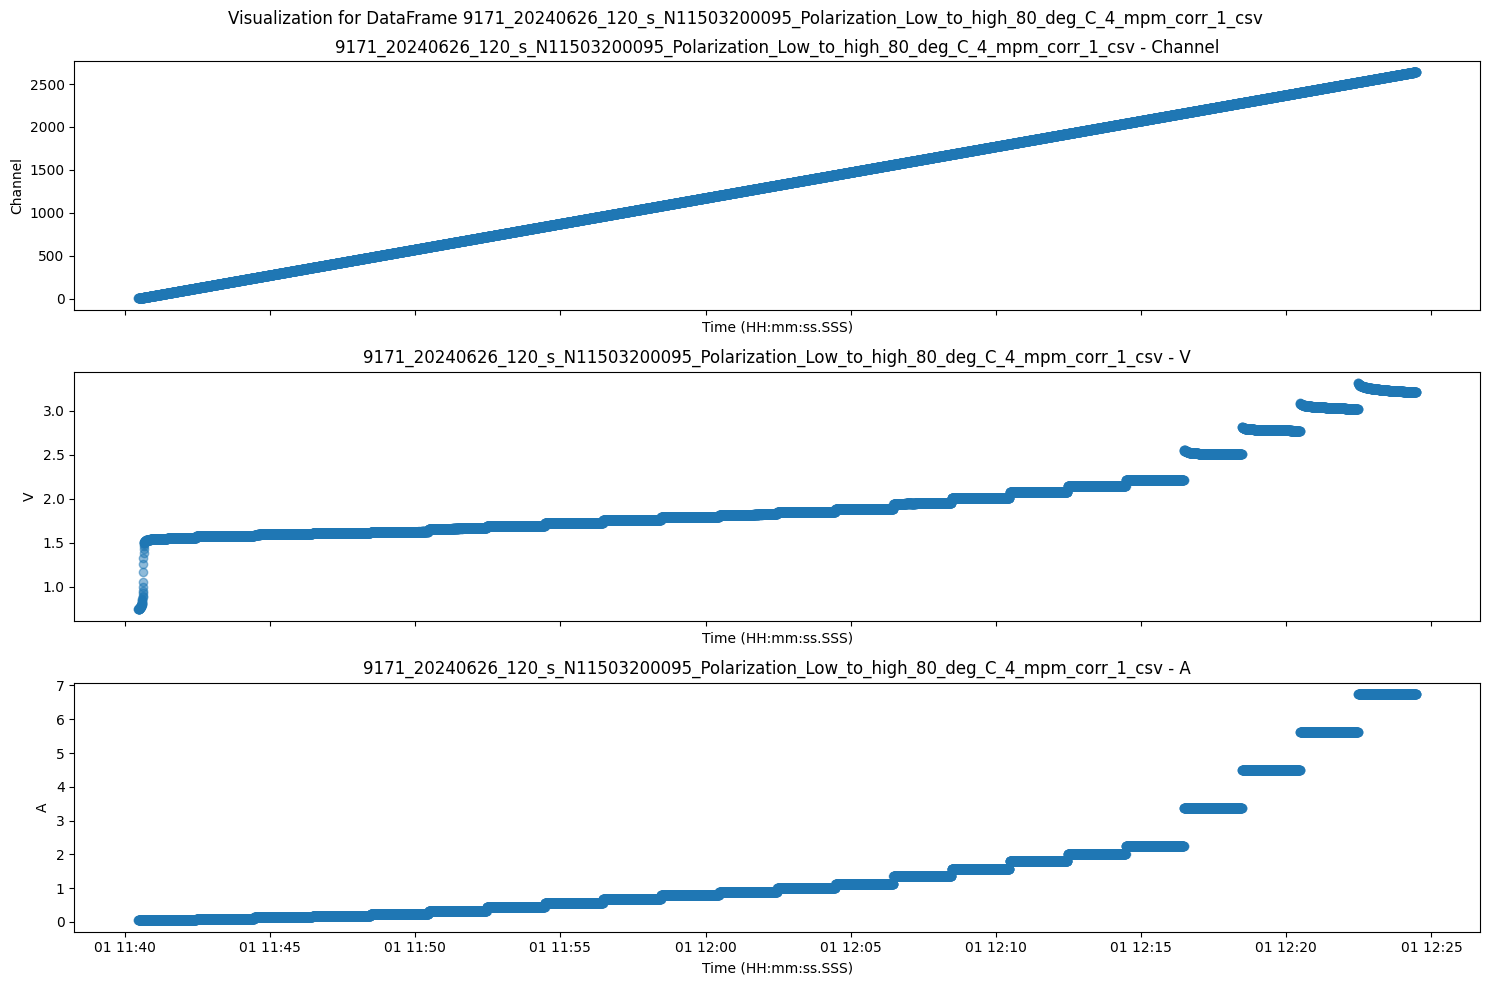

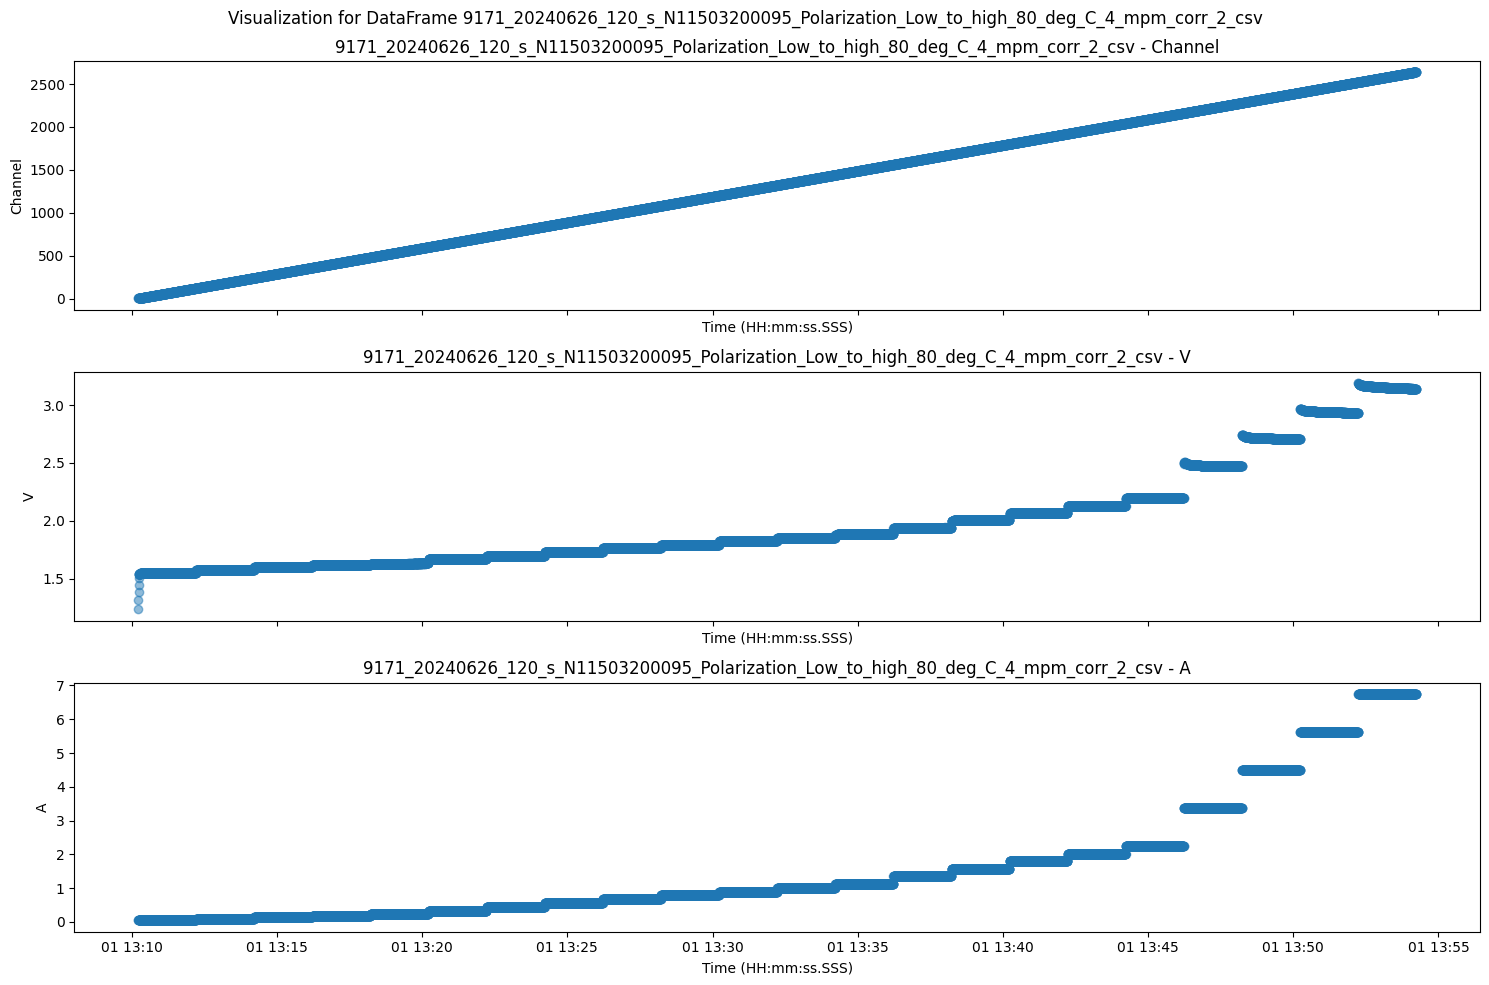

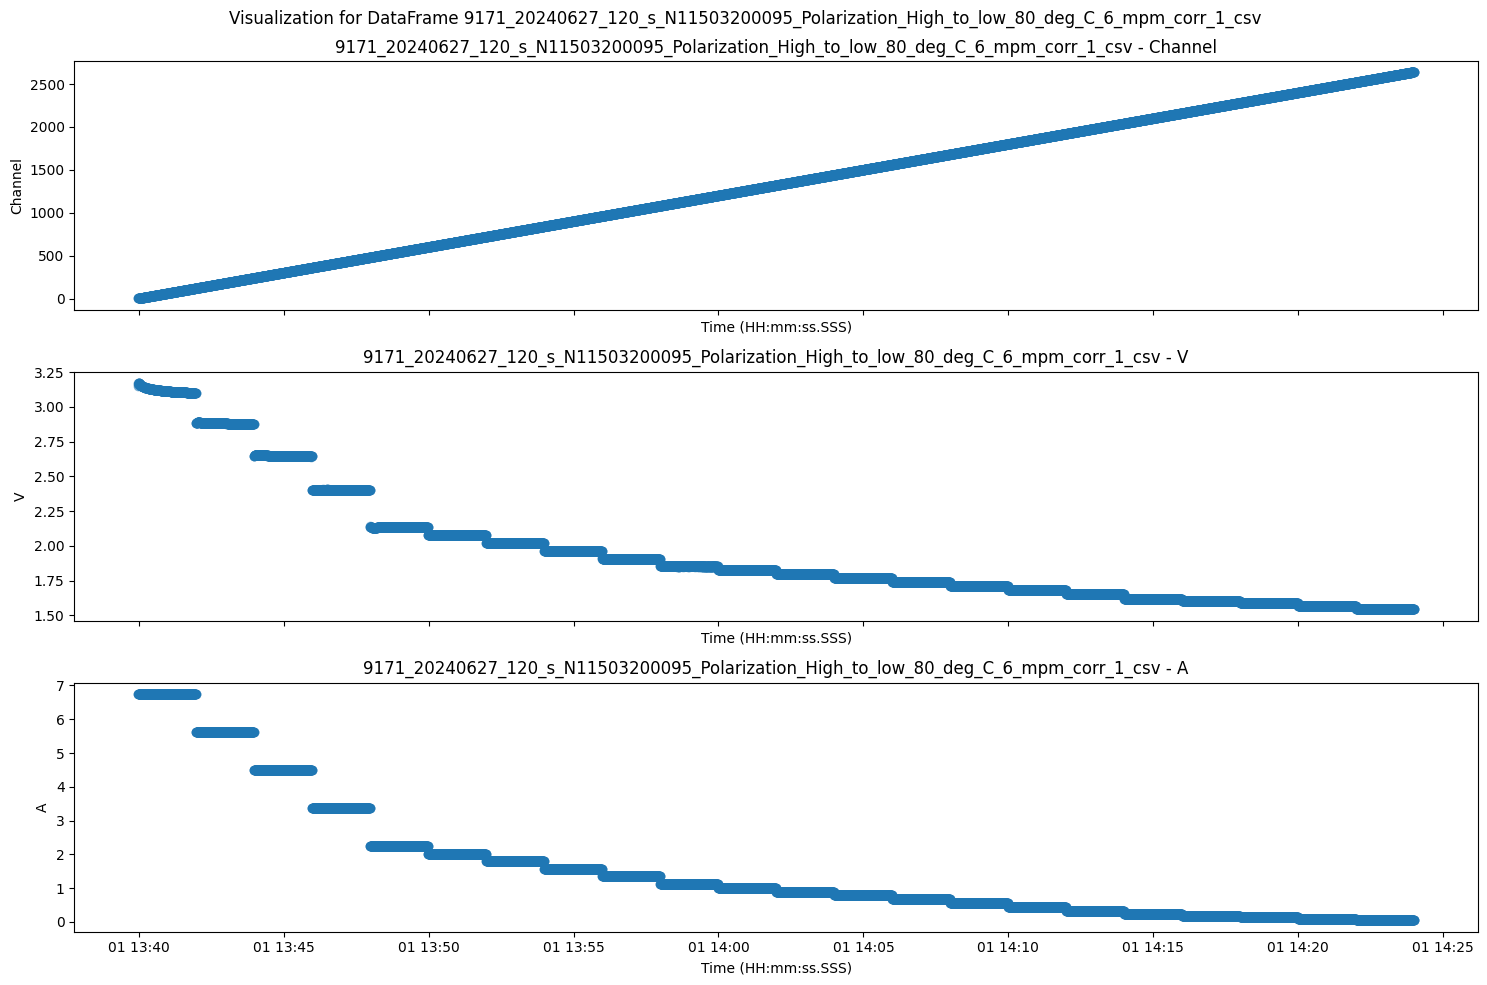

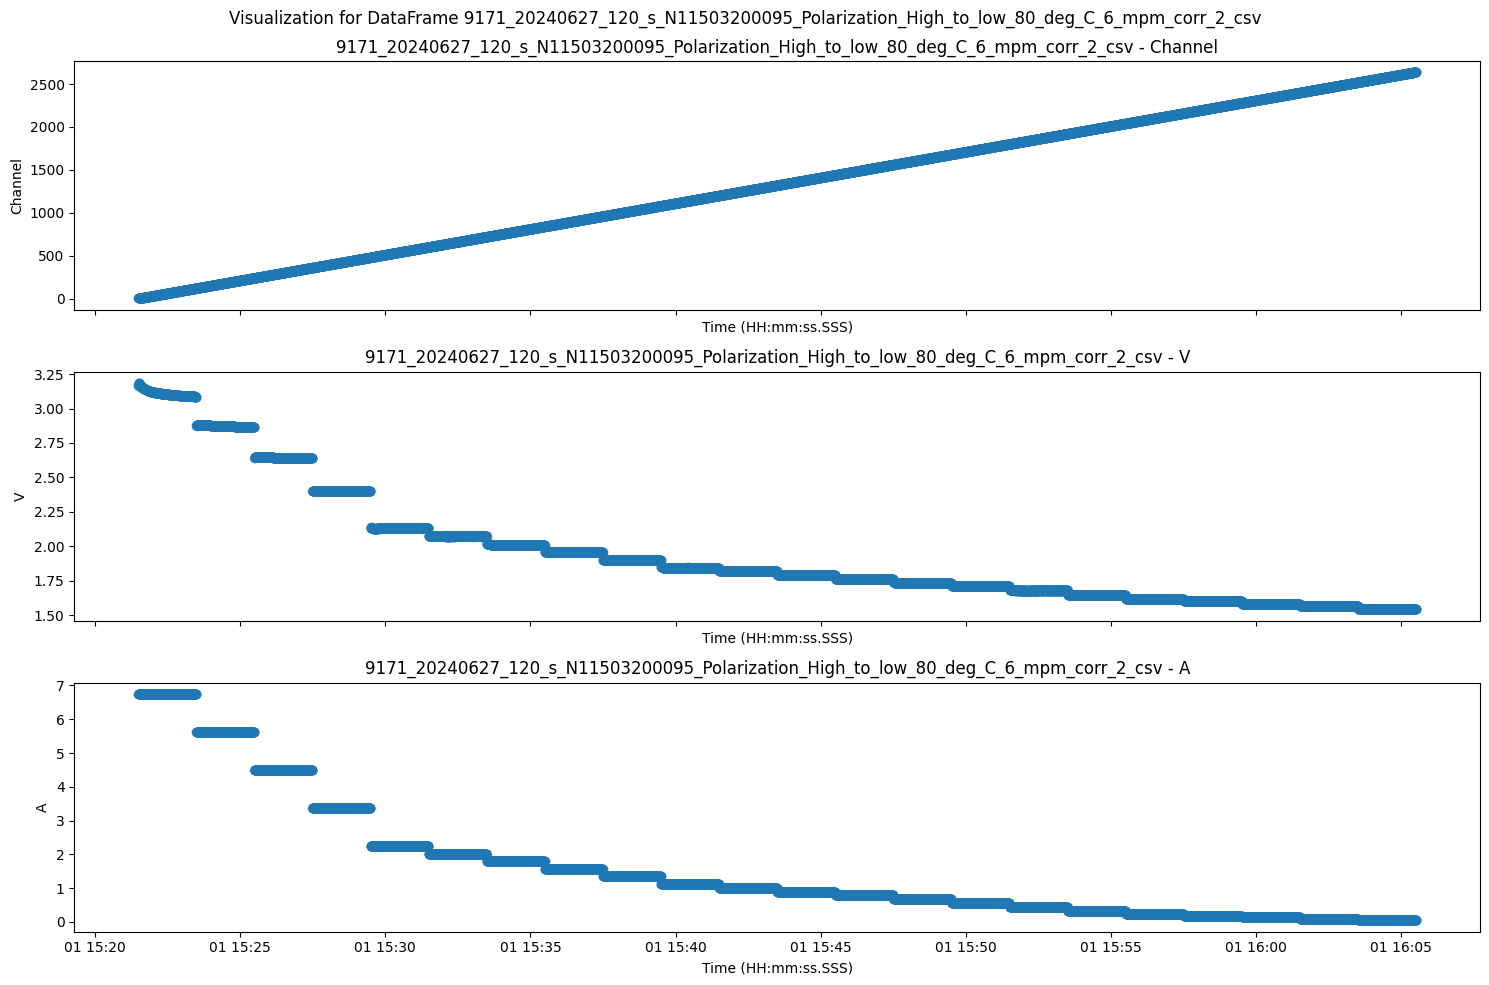

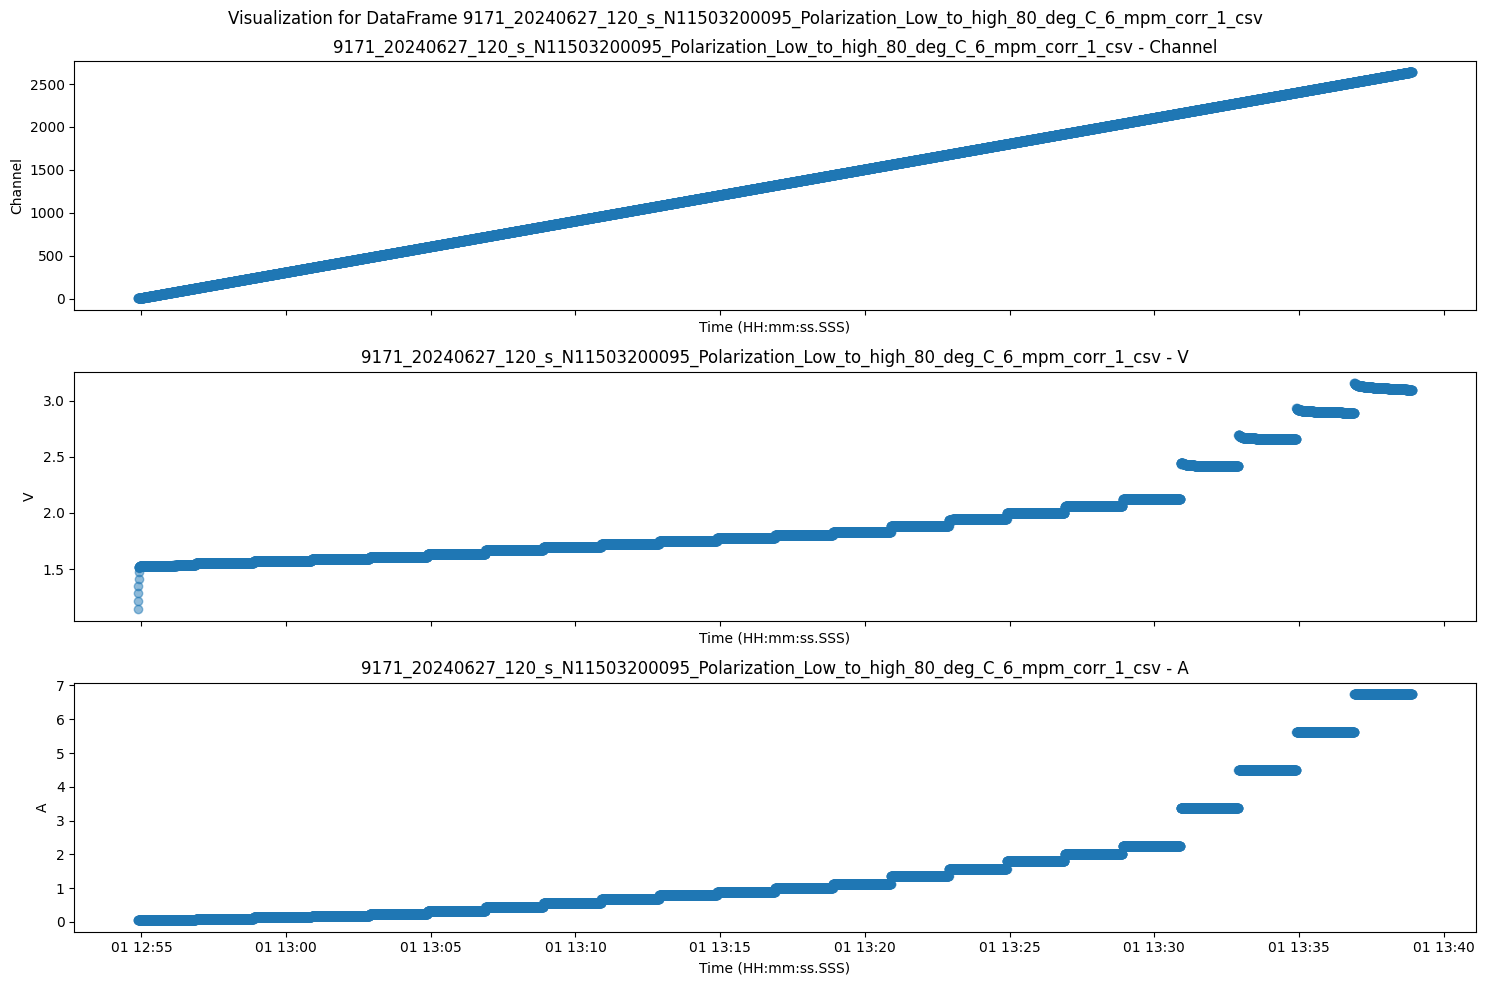

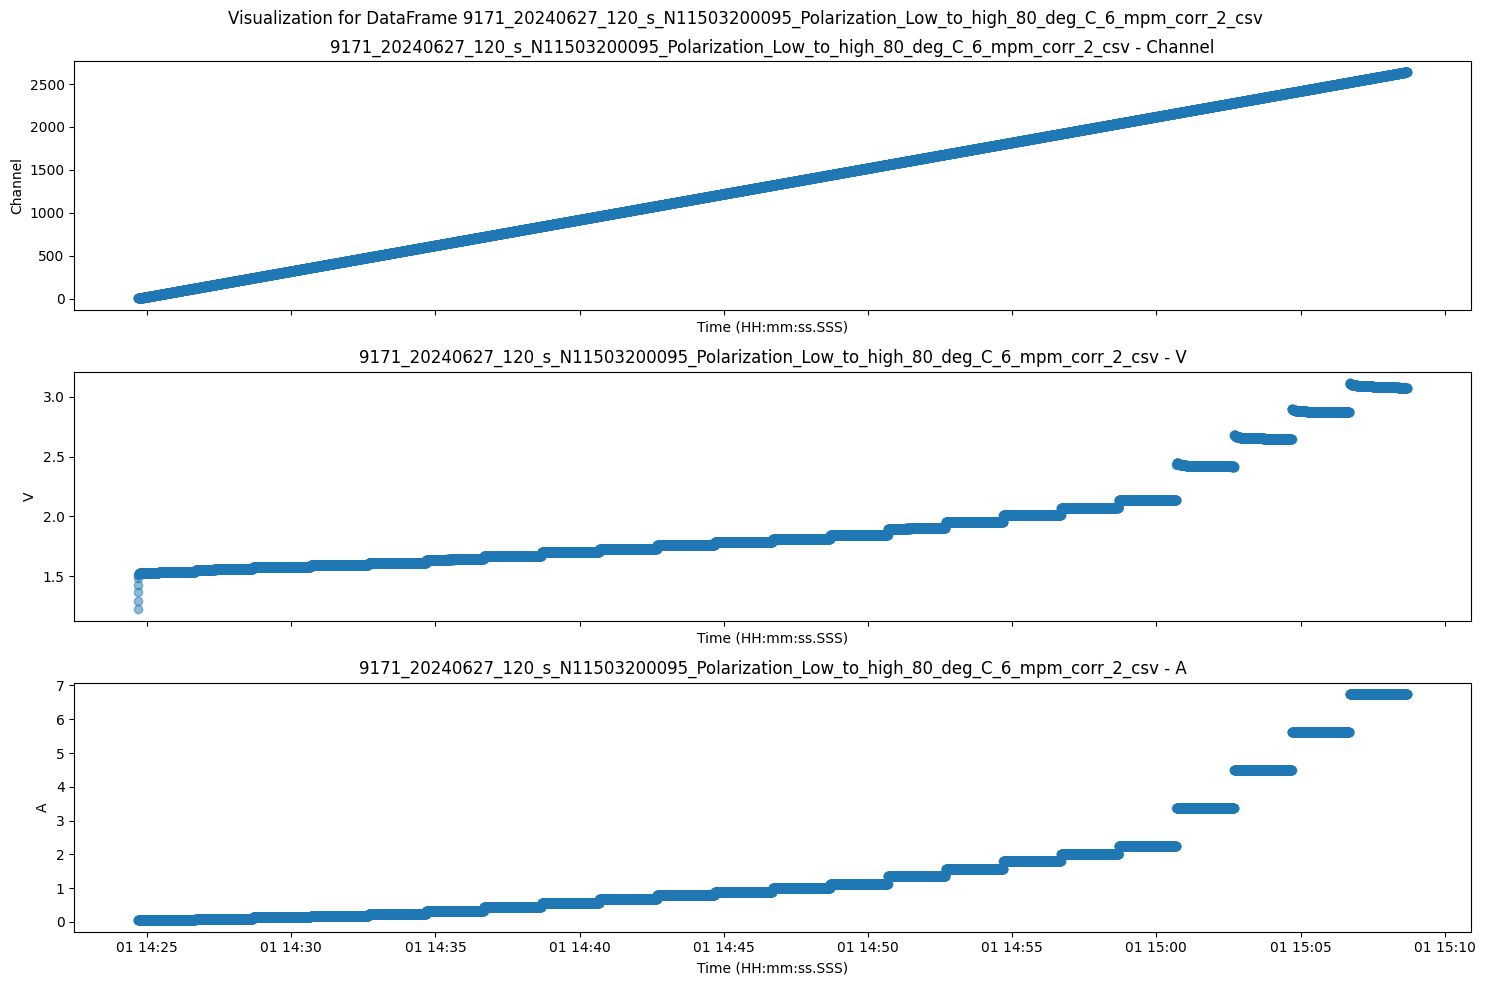

In [27]:
# Constants
TIME_COLUMN_NAME = 'Time (HH:mm:ss.SSS)'

# Create plots for each DataFrame
for key, df in dataframes.items():
    # Convert TIME_COLUMN_NAME to datetime with explicit format
    df[TIME_COLUMN_NAME] = pd.to_datetime(df[TIME_COLUMN_NAME], format='%H:%M:%S.%f', errors='coerce')
    
    # Ensure 'Channel', 'V', and 'A' are numeric
    df[['Channel', 'V', 'A']] = df[['Channel', 'V', 'A']].apply(pd.to_numeric, errors='coerce')
    
    # Plotting setup
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True)
    fig.suptitle(f"Visualization for DataFrame {key}")
    
    # Scatter plots using plot_scatterplot_on_ax
    ptt.plot_scatterplot_on_ax(axs[0], df[TIME_COLUMN_NAME], df['Channel'], x_label=TIME_COLUMN_NAME, y_label='Channel', title=f"{key} - Channel")
    ptt.plot_scatterplot_on_ax(axs[1], df[TIME_COLUMN_NAME], df['V'], x_label=TIME_COLUMN_NAME, y_label='V', title=f"{key} - V")
    ptt.plot_scatterplot_on_ax(axs[2], df[TIME_COLUMN_NAME], df['A'], x_label=TIME_COLUMN_NAME, y_label='A', title=f"{key} - A")
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


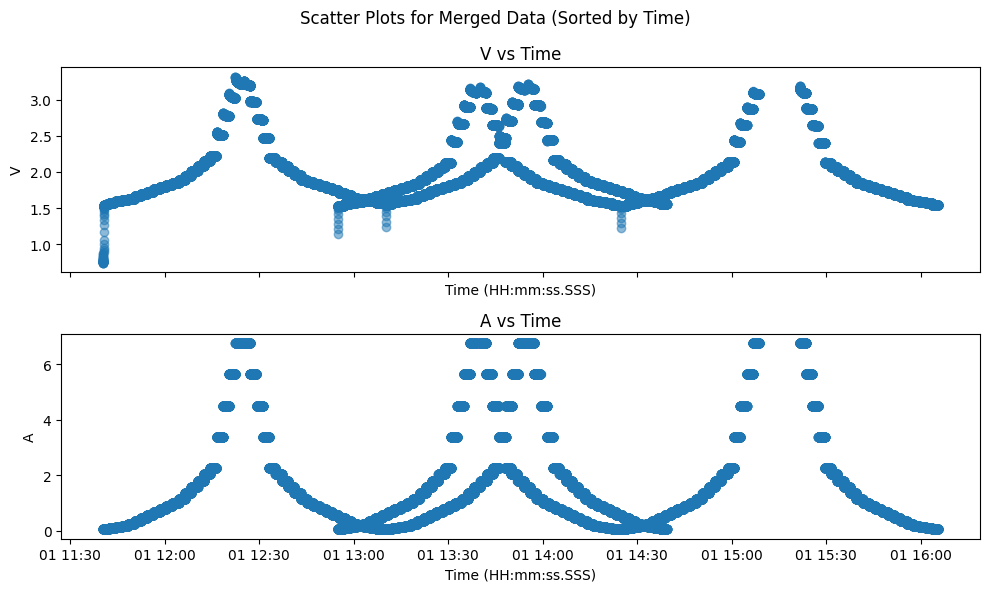

In [28]:
# Merge all DataFrames into one
merged_df = pd.concat(dataframes.values(), ignore_index=True)

# Convert 'Time (HH:mm:ss.SSS)' to datetime if it's not already
merged_df['Time (HH:mm:ss.SSS)'] = pd.to_datetime(merged_df['Time (HH:mm:ss.SSS)'], format='%H:%M:%S.%f', errors='coerce')

# Sort by 'Time (HH:mm:ss.SSS)'
merged_df.sort_values(by='Time (HH:mm:ss.SSS)', inplace=True)

# Plotting setup
fig, axs = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)
fig.suptitle('Scatter Plots for Merged Data (Sorted by Time)')

# Scatter plots using plot_scatterplot_on_ax
# ptt.plot_scatterplot_on_ax(axs[0], merged_df['Time (HH:mm:ss.SSS)'], merged_df['Channel'], x_label='Time (HH:mm:ss.SSS)', y_label='Channel', title='Channel vs Time')
ptt.plot_scatterplot_on_ax(axs[0], merged_df['Time (HH:mm:ss.SSS)'], merged_df['V'], x_label='Time (HH:mm:ss.SSS)', y_label='V', title='V vs Time')
ptt.plot_scatterplot_on_ax(axs[1], merged_df['Time (HH:mm:ss.SSS)'], merged_df['A'], x_label='Time (HH:mm:ss.SSS)', y_label='A', title='A vs Time')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\onyer\AppData\Local\Temp\ipykernel_25308\2274507100.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['deltaT'] = filtered_df['Time (HH:mm:ss.SSS)'].diff().dt.total_seconds()


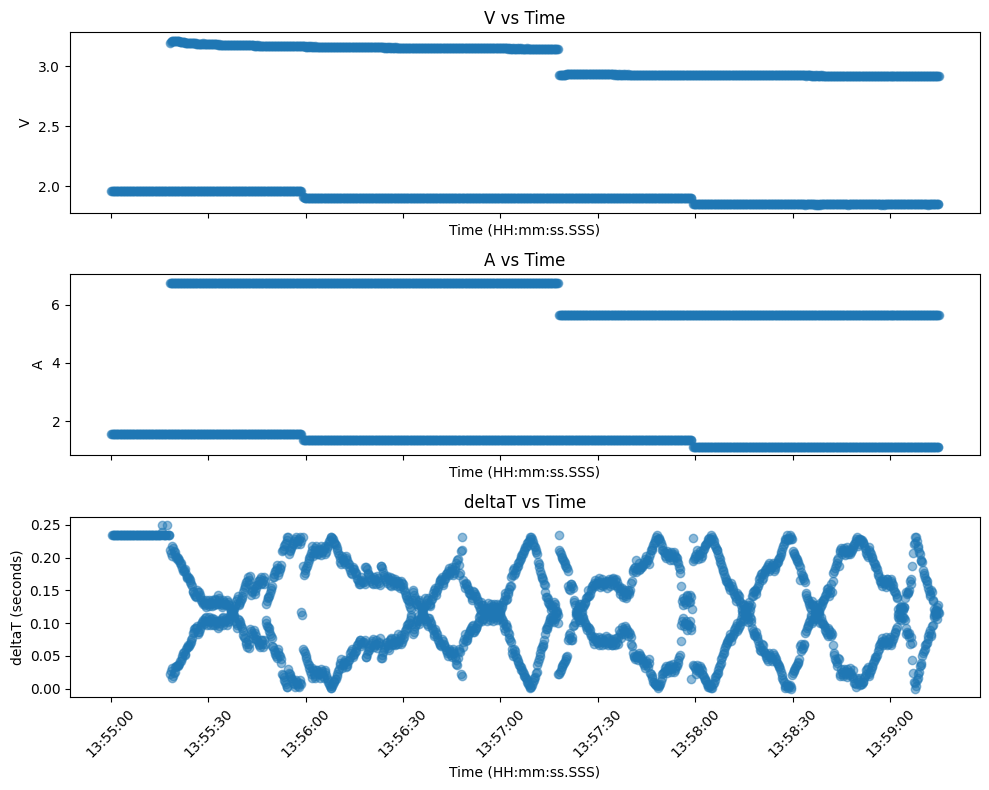

V data has 2101 data points.
All deltaT values are the same: False


In [29]:
# Define the time range
start_time = pd.to_datetime('13:55:00.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('13:59:15.000', format='%H:%M:%S.%f')

# Filter the DataFrame
filtered_df = merged_df[(merged_df['Time (HH:mm:ss.SSS)'] >= start_time) & (merged_df['Time (HH:mm:ss.SSS)'] <= end_time)]

# Calculate the time difference between consecutive points and store in deltaT
filtered_df['deltaT'] = filtered_df['Time (HH:mm:ss.SSS)'].diff().dt.total_seconds()

# Plot the filtered data using plot_scatterplot_on_ax
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

ptt.plot_scatterplot_on_ax(ax1, filtered_df['Time (HH:mm:ss.SSS)'], filtered_df['V'], x_label='Time (HH:mm:ss.SSS)', y_label='V', title='V vs Time')
ptt.plot_scatterplot_on_ax(ax2, filtered_df['Time (HH:mm:ss.SSS)'], filtered_df['A'], x_label='Time (HH:mm:ss.SSS)', y_label='A', title='A vs Time')
ptt.plot_scatterplot_on_ax(ax3, filtered_df['Time (HH:mm:ss.SSS)'], filtered_df['deltaT'], x_label='Time (HH:mm:ss.SSS)', y_label='deltaT (seconds)', title='deltaT vs Time')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"V data has {len(filtered_df['V'])} data points.")

# Check if all deltaT values are the same
all_same = filtered_df['deltaT'].dropna().nunique() == 1
print(f"All deltaT values are the same: {all_same}")


Fitting model for Charging Cycle 1 with 2098 data points.


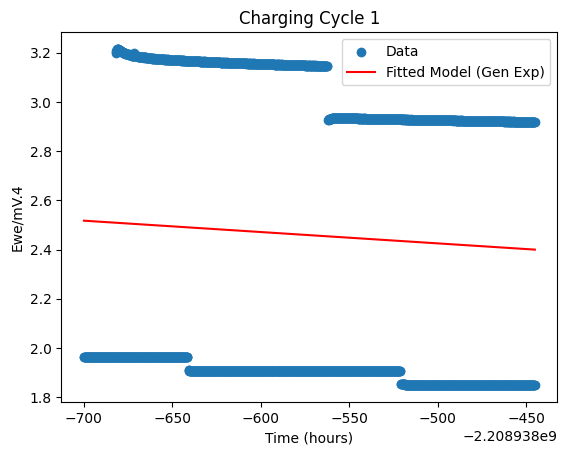

c1 = -545.5623
c2 = 545.5623
c3 = 0.0001
b2 = 0.0000
b3 = 0.1689
Cost for Charging Cycle 1: 0.3332461161119351
average percent error for Charging Cycle 1: 24.447842590365088


In [30]:
# Fit the model to the data
times = pd.to_datetime(filtered_df['Time (HH:mm:ss.SSS)']).astype(int) / 10**9  # Convert time to seconds since epoch
values = filtered_df['V'].values  # Assuming 'V' is the dependent variable

# Fit and plot the cycle
idx = 0
n_terms = 2  # Set the number of exponential terms
times, values, y_fitted, fitted_params, success = fit_and_plot_cycle(times, values, idx, n_terms)


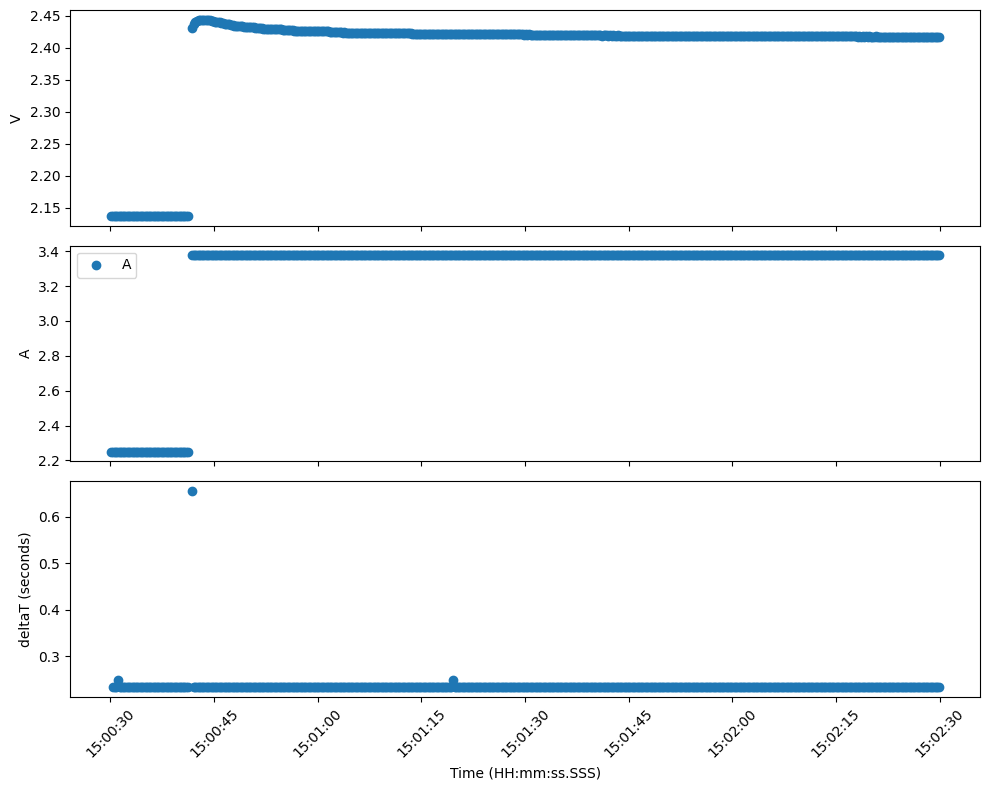

V data has 510 data points.
All deltaT values are the same: False
Estimated parameters (theta): [ 0.26133852 -0.26138196 -1.02054777  0.02050475]
Phi matrix: [[ 2.251  2.251 -2.137 -2.137]
 [ 2.251  2.251 -2.137 -2.137]
 [ 2.251  2.251 -2.137 -2.137]
 ...
 [ 3.376  3.376 -2.417 -2.417]
 [ 3.376  3.376 -2.417 -2.417]
 [ 3.376  3.376 -2.417 -2.417]]
Y vector: [2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137
 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137
 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137
 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.137 2.431 2.437
 2.441 2.442 2.444 2.444 2.444 2.444 2.444 2.444 2.443 2.443 2.442 2.442
 2.441 2.441 2.44  2.44  2.439 2.439 2.438 2.438 2.437 2.437 2.436 2.436
 2.435 2.435 2.435 2.434 2.434 2.434 2.433 2.433 2.433 2.433 2.432 2.432
 2.432 2.431 2.431 2.431 2.431 2.431 2.43  2.43  2.43  2.43  2.429 2.429
 2.429 2.429 2.429 2.429 2.429 2.429 2.428 2.428 2.428 2

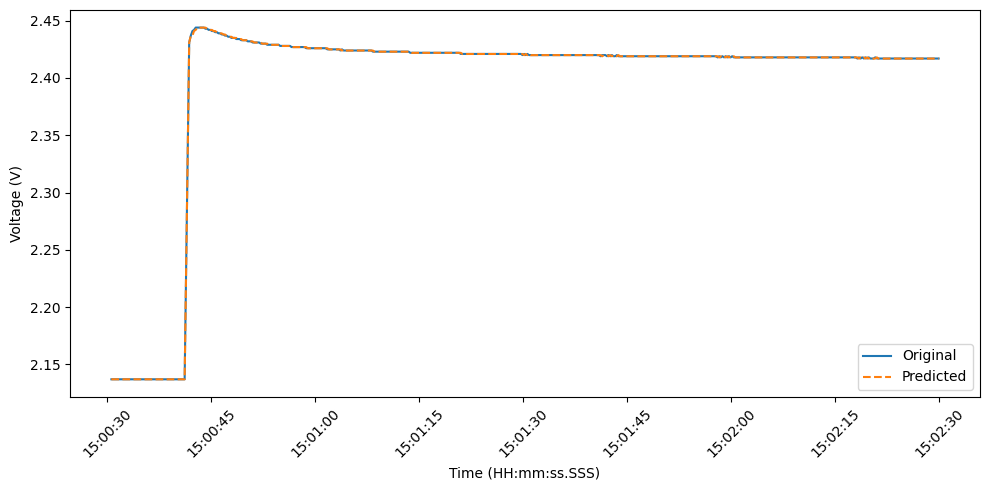

In [31]:
# Define the time range
# start_time = pd.to_datetime('12:22:20.000', format='%H:%M:%S.%f')
# end_time = pd.to_datetime('12:24:30.000', format='%H:%M:%S.%f')

start_time = pd.to_datetime('15:00:30.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('15:02:30.000', format='%H:%M:%S.%f')

# Filter the DataFrame
filtered_df2 = merged_df[(merged_df['Time (HH:mm:ss.SSS)'] >= start_time) & (merged_df['Time (HH:mm:ss.SSS)'] <= end_time)]

filtered_df2 = filtered_df2.dropna(subset=['V', 'A'])


# Further filter the DataFrame to include only rows where 'A' is 6.752
# filtered_df2 = filtered_df2[filtered_df2['A'] == 6.752]

# Calculate the time difference between consecutive points and store in deltaT
filtered_df2['deltaT'] = filtered_df2['Time (HH:mm:ss.SSS)'].diff().dt.total_seconds()

# Plot the filtered data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

ax1.scatter(filtered_df2['Time (HH:mm:ss.SSS)'], filtered_df2['V'])
ax1.set_ylabel('V')

ax2.scatter(filtered_df2['Time (HH:mm:ss.SSS)'], filtered_df2['A'])
ax2.set_ylabel('A')
ax2.legend(['A'])

ax3.scatter(filtered_df2['Time (HH:mm:ss.SSS)'], filtered_df2['deltaT'], marker='o')
ax3.set_ylabel('deltaT (seconds)')
ax3.set_xlabel('Time (HH:mm:ss.SSS)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"V data has {len(filtered_df2['V'])} data points.")

# Check if all deltaT values are the same
all_same = filtered_df2['deltaT'].dropna().nunique() == 1
print(f"All deltaT values are the same: {all_same}")

# Use voltage (V) as the output and current (A) as the input
u = filtered_df2['A'].values 
y = filtered_df2['V'].values
order = 2  # Specify the order of the system


# Perform discrete time system identification
theta, Phi, Y = arx_model(u, y, order)
print("Estimated parameters (theta):", theta)
print("Phi matrix:", Phi)
print("Y vector:", Y)

# Use the identified parameters to predict and plot
y_pred = Phi @ theta

# Plot the original and predicted values
plt.figure(figsize=(10, 5))
plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'][order:], y[order:], label='Original')
plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'][order:], y_pred, label='Predicted', linestyle='--')
plt.xlabel('Time (HH:mm:ss.SSS)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


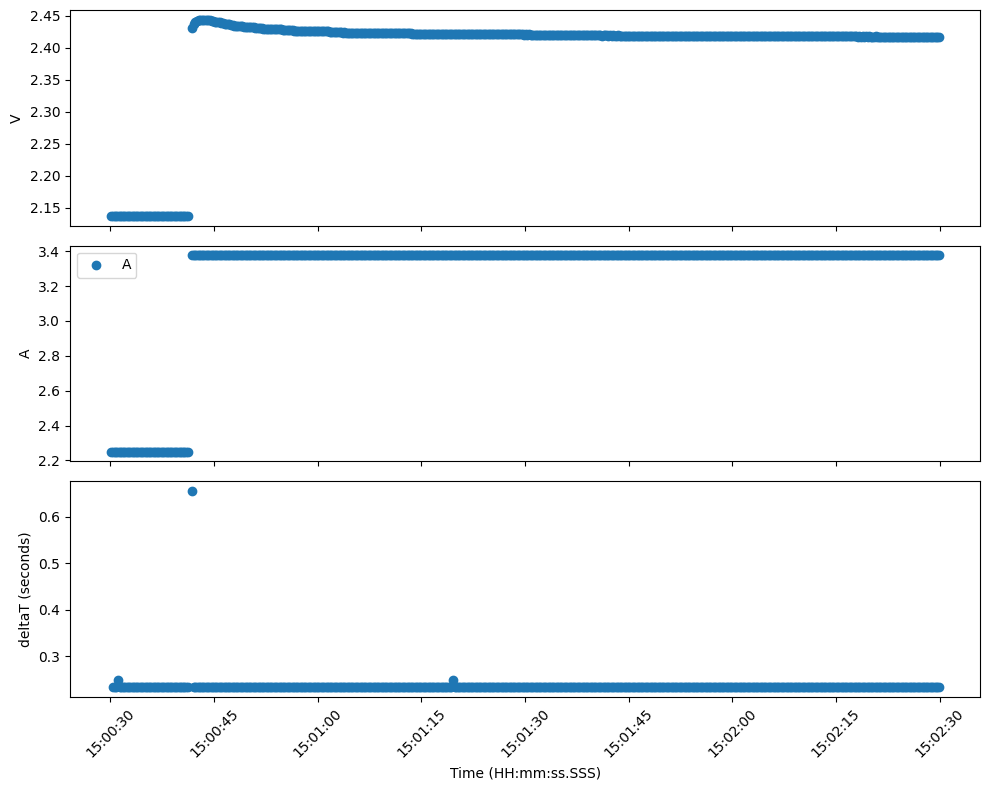

V data has 510 data points.
All deltaT values are the same: False
Estimated parameters (theta): [ 0.26100103 -0.36204953  0.10314011 -1.41252987  0.42089421]
G_theta: <TransferFunction>: sys[11918]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.261 z^2 - 0.362 z + 0.1031
----------------------------
   z^2 - 1.413 z + 0.4209

dt = 1

(510,)


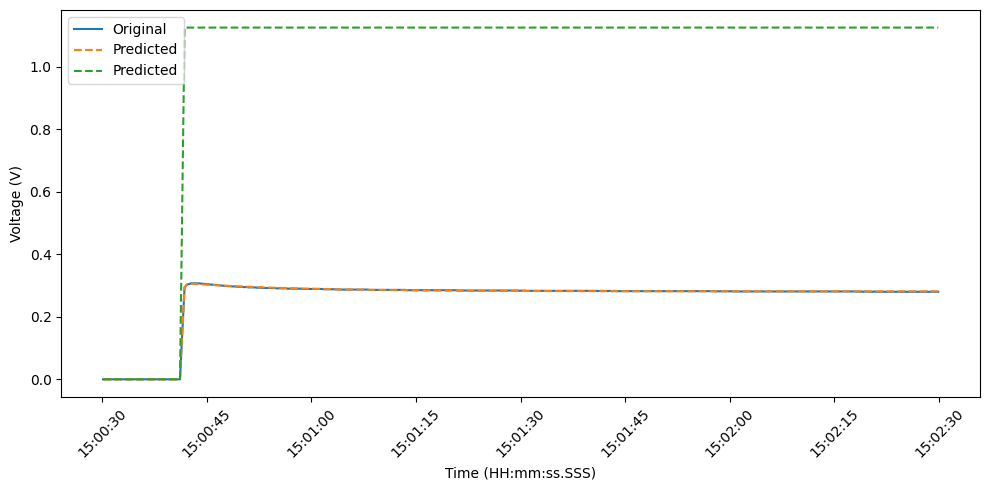

In [42]:
import scipy as sp
import control as ct
# Define the time range
# start_time = pd.to_datetime('12:22:20.000', format='%H:%M:%S.%f')
# end_time = pd.to_datetime('12:24:30.000', format='%H:%M:%S.%f')

start_time = pd.to_datetime('15:00:30.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('15:02:30.000', format='%H:%M:%S.%f')

# Filter the DataFrame
filtered_df2 = merged_df[(merged_df['Time (HH:mm:ss.SSS)'] >= start_time) & (merged_df['Time (HH:mm:ss.SSS)'] <= end_time)]

filtered_df2 = filtered_df2.dropna(subset=['V', 'A'])


# Further filter the DataFrame to include only rows where 'A' is 6.752
# filtered_df2 = filtered_df2[filtered_df2['A'] == 6.752]

# Calculate the time difference between consecutive points and store in deltaT
filtered_df2['deltaT'] = filtered_df2['Time (HH:mm:ss.SSS)'].diff().dt.total_seconds()

# Plot the filtered data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

ax1.scatter(filtered_df2['Time (HH:mm:ss.SSS)'], filtered_df2['V'])
ax1.set_ylabel('V')

ax2.scatter(filtered_df2['Time (HH:mm:ss.SSS)'], filtered_df2['A'])
ax2.set_ylabel('A')
ax2.legend(['A'])

ax3.scatter(filtered_df2['Time (HH:mm:ss.SSS)'], filtered_df2['deltaT'], marker='o')
ax3.set_ylabel('deltaT (seconds)')
ax3.set_xlabel('Time (HH:mm:ss.SSS)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"V data has {len(filtered_df2['V'])} data points.")

# Check if all deltaT values are the same
all_same = filtered_df2['deltaT'].dropna().nunique() == 1
print(f"All deltaT values are the same: {all_same}")

# Use voltage (V) as the output and current (A) as the input
u = filtered_df2['A'].values 
u -= u[0]
# # Plot the original and predicted values
# plt.figure(figsize=(10, 5))
# plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'], y, label='Original')
# plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'], y_pred, label='Predicted', linestyle='--')
# plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'], u, label='Predicted', linestyle='--')
# plt.xlabel('Time (HH:mm:ss.SSS)')
# plt.ylabel('Voltage (V)')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
y = filtered_df2['V'].values
y -= y[0]
2  # Specify thef the system


# Perform discrete time system identification
nf = 2
nb = 3
nk = 0
nc = 0
nd = 0
# Calculate the ARX model parameters
n_arx = [nf, nb, nk]
theta_arx = sid.V_arx_lin_reg(n_arx, y, u)
    
# Prepare initial guess for Box-Jenkins model
theta_box_jenkins = np.concatenate((
        theta_arx[n_arx[0]:np.sum(n_arx)], 
        np.zeros(nc + nd), 
        theta_arx[0:n_arx[0]]
    ))

    # Define the structure for the Box-Jenkins model
n_bj = [nb, nc, nd, nf, nk]
    
    # Perform optimization
optimization_results = sp.optimize.least_squares(
        sid.V_box_jenkins, 
        theta_box_jenkins, 
        jac=sid.jac_V_bj, 
        args=(n_bj, y, u)
    )
    
theta = optimization_results.x

print("Estimated parameters (theta):", theta)
G_theta, H_theta = sid.theta_2_tf_box_jenkins(theta, n_bj, Ts=1)
print("G_theta:", G_theta)
# print("Phi matrix:", Phi)
# print("Y vector:", Y)

# # Use the identified parameters to predict and plot
y_pred = sid.y_hat_box_jenkins(theta, n_bj, y, u)

print(y_pred.shape)

# Plot the original and predicted values
plt.figure(figsize=(10, 5))
plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'], y, label='Original')
plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'], y_pred, label='Predicted', linestyle='--')
plt.plot(filtered_df2['Time (HH:mm:ss.SSS)'], u, label='Predicted', linestyle='--')
plt.xlabel('Time (HH:mm:ss.SSS)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[[ 2.251  2.251 -2.137 -2.137]
 [ 3.376  2.251 -2.137 -2.137]
 [ 3.376  3.376 -2.431 -2.137]
 [ 3.376  3.376 -2.437 -2.431]
 [ 3.376  3.376 -2.441 -2.437]
 [ 3.376  3.376 -2.442 -2.441]
 [ 3.376  3.376 -2.444 -2.442]
 [ 3.376  3.376 -2.444 -2.444]
 [ 3.376  3.376 -2.444 -2.444]
 [ 3.376  3.376 -2.444 -2.444]
 [ 3.376  3.376 -2.444 -2.444]
 [ 3.376  3.376 -2.444 -2.444]
 [ 3.376  3.376 -2.443 -2.444]
 [ 3.376  3.376 -2.443 -2.443]
 [ 3.376  3.376 -2.442 -2.443]]
[[ 5498.669758  5494.871758 -3998.133914 -3997.188634]
 [ 5494.871758  5492.339383 -3995.729789 -3994.784509]
 [-3998.133914 -3995.729789  2919.199803  2918.518966]
 [-3997.188634 -3994.784509  2918.518966  2917.924683]]
0


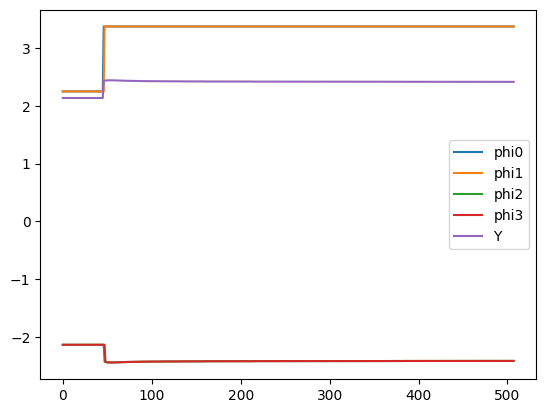

In [33]:
fig,ax = plt.subplots(1)
ax.plot(Phi[:,0],label='phi0')
ax.plot(Phi[:,1],label='phi1')
ax.plot(Phi[:,2],label='phi2')
ax.plot(Phi[:,3],label='phi3')
ax.plot(Y,label='Y')
ax.legend()

print(Phi[45:60,:])

print(Phi.T @ Phi)

is_nan = np.isnan(Phi).sum()
print(is_nan)

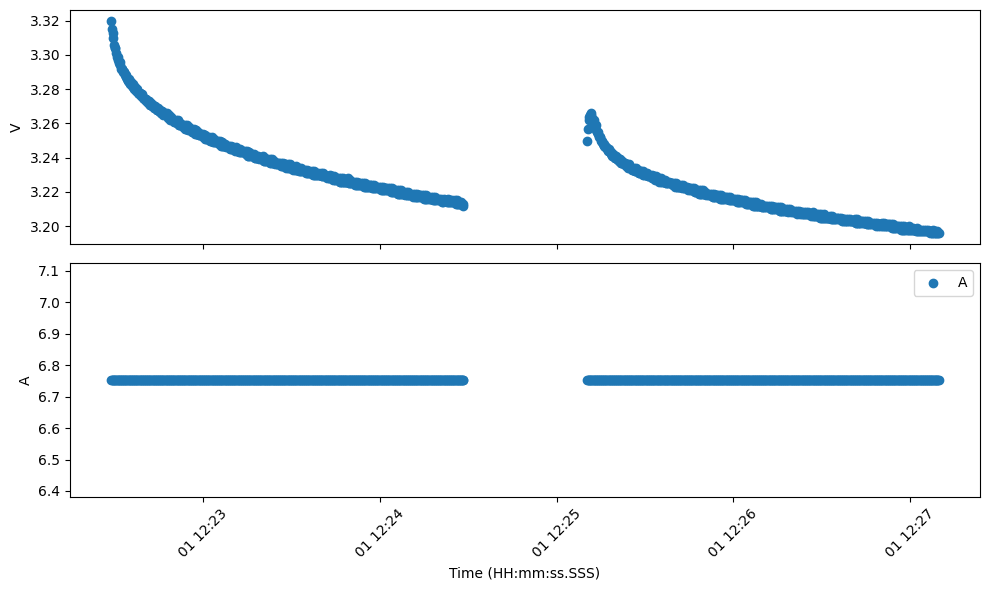

In [34]:
# Define the time range
start_time = pd.to_datetime('12:10:00.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('12:30:00.000', format='%H:%M:%S.%f')

# Filter the DataFrame
filtered_df1 = merged_df[(merged_df['Time (HH:mm:ss.SSS)'] >= start_time) & (merged_df['Time (HH:mm:ss.SSS)'] <= end_time)]

# Further filter the DataFrame to include only rows where 'A' is 6.752
filtered_df1 = filtered_df1[filtered_df1['A'] == 6.752]

# Plot the filtered data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.scatter(filtered_df1['Time (HH:mm:ss.SSS)'], filtered_df1['V'])
ax1.set_ylabel('V')

ax2.scatter(filtered_df1['Time (HH:mm:ss.SSS)'], filtered_df1['A'])
ax2.set_ylabel('A')
ax2.legend(['A'])

plt.xlabel('Time (HH:mm:ss.SSS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
